# The use of προσκυνέω (Nestle1904GBI)

## Table of content <a class="anchor" id="TOC">
* [1 - Introduction](#first-bullet)
    
    * [1.1 - Why is this relevant?](#bullet1_1)
    
    * [1.2 - Translating into Text-Fabric queries](#bullet1_2)
    
* [2 - Load Text-Fabric app and data](#second-bullet)
* [3 - Performing the queries](#third-bullet)
    * [3.1 - Determine the renderings of προσκυνέω](#bullet3_1)
    * [3.2 - Alternative way of coding](#bullet3_2)
    * [3.3 - Using a search template](#bullet3_3)
    * [3.4 - What is being 'προσκυνέω-ed'?](#bullet3_4)
    * [3.5 - Pie chart showing the renderings](#bullet3_5)

# 1 - Introduction <a class="anchor" id="first-bullet"></a>

In this Jupyter NoteBook we will examine the use of lemma προσκυνέω in the Greek New Testament.

## 1.1 - Why is this relevant? <a class="anchor" id="#bullet1_1"></a>

There is an ongoing debate whether προσκυνέω must mean "worship" in a divine sense, especialy when it refers to Jesus or God. The word can refer to homage or respect given to people in authority ([see also entry in Liddel-Scott-Jones Greek-English Lexion](https://stephanus.tlg.uci.edu/lsj/#eid=92238)). So verses that refer to Jesus receiving προσκυνέω may not always prove worship of him as God. The meaning depends on context.

## 1.2 - Translating into Text-Fabric queries <a class="anchor" id="#bullet1_2"></a>

The following examples gather data related to the use of προσκυνέω using various methods and present the results in different ways.


# 2 - Load Text-Fabric app and data <a class="anchor" id="second-bullet"></a>
##### [Back to TOC](#TOC)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Loading the New Testament TextFabric code
# Note: it is assumed Text-Fabric is installed in your environment.

from tf.fabric import Fabric
from tf.app import use

In [3]:
# load the app and data
N1904 = use ("tonyjurg/Nestle1904GBI:latest", hoist=globals())

**Locating corpus resources ...**

The requested data is not available offline
	~/text-fabric-data/github/tonyjurg/Nestle1904GBI/tf/0.3 not found


Name,# of nodes,# slots/node,% coverage
book,27,5102.93,100
chapter,260,529.92,100
sentence,5720,24.09,100
verse,7944,17.34,100
clause,16124,8.54,100
phrase,73547,1.87,100
word,137779,1.00,100


# 3 - Performing the queries <a class="anchor" id="third-bullet"></a>

## 3.1 - Determine the renderings of προσκυνέω <a class="anchor" id="bullet3_1"></a>
##### [Back to TOC](#TOC)

This code will produce a list of occurrences of the lemma 'προσκυνέω' along with their accompanying gloss.

In [5]:
# Library to format table
from tabulate import tabulate

# Gather the results
Results=[]
for node in F.lemma.s('προσκυνέω'):
    # Following line creates a nicely formated presentation of the verse
    location="{} {}:{}".format(F.book.v(node),F.chapter.v(node),F.verse.v(node))
    result=(location,F.word.v(node),F.gloss_EN.v(node))
    Results.append(result)
    
# Produce the table
headers = ["location","word","gloss"]
print(tabulate(Results, headers=headers, tablefmt='fancy_grid'))

╒═════════════════════╤══════════════════╤═════════════════════════╕
│ location            │ word             │ gloss                   │
╞═════════════════════╪══════════════════╪═════════════════════════╡
│ Matthew 2:2         │ προσκυνῆσαι      │ to worship              │
├─────────────────────┼──────────────────┼─────────────────────────┤
│ Matthew 2:8         │ προσκυνήσω       │ may worship             │
├─────────────────────┼──────────────────┼─────────────────────────┤
│ Matthew 2:11        │ προσεκύνησαν     │ they worshiped          │
├─────────────────────┼──────────────────┼─────────────────────────┤
│ Matthew 4:9         │ προσκυνήσῃς      │ You will worship        │
├─────────────────────┼──────────────────┼─────────────────────────┤
│ Matthew 4:10        │ προσκυνήσεις     │ you shall worship       │
├─────────────────────┼──────────────────┼─────────────────────────┤
│ Matthew 8:2         │ προσεκύνει       │ was worshipping         │
├─────────────────────┼───────────

## 3.2 - Alternative way of coding <a class="anchor" id="bullet3_2"></a>
##### [Back to TOC](#TOC)

Note that the the following line of code in previous example:
```
   for node in F.lemma.s('προσκυνέω'):
       {rest of the code}
```

is functionaly equivalent to this three line of code:
```
    for node in F.otype.s('word'):
        lemma=F.lemma.v(node)
        if lemma == 'προσκυνέω':
            {rest of the code}
```

## 3.3 - Using a search template <a class="anchor" id="bullet3_3"></a>
##### [Back to TOC](#TOC)

The same selection can also be made using a search template. Note that the number of results (56) differs from the previous code(59). The reasone is that here the selection is on clause and in the previous code on words. (John 4:23&24 and Revelation 13:4 and 19:10 have duplicate occurances of lemma προσκυνέω).


In [122]:
SearchWorship = '''
book 
  chapter
     verse
       clause
         word lemma=προσκυνέω gloss_EN
'''
WorshipList = N1904.search(SearchWorship)

  0.15s 56 results


The resulting data (stored in WorshipList) can be further processed. For example to print the first 5 occurences in a table:


In [126]:
N1904.table(WorshipList, condensed=True, end=5)

n,p,verse,word,clause
1,Matthew 2:2,,προσκυνῆσαι,γὰρεἴδομεναὐτοῦτὸνἀστέραἐντῇἀνατολῇκαὶἤλθομενπροσκυνῆσαιαὐτῷ.
2,Matthew 2:8,,προσκυνήσω,ὅπωςκἀγὼἐλθὼνπροσκυνήσωαὐτῷ.
3,Matthew 2:11,,"καὶπεσόντεςπροσεκύνησαναὐτῷ,",προσεκύνησαν
4,Matthew 4:9,,ἐὰνπεσὼνπροσκυνήσῃςμοι.,προσκυνήσῃς
5,Matthew 4:10,,προσκυνήσεις,Σατανᾶ·γάργέγραπταιΚύριοντὸνθεόνσουπροσκυνήσειςκαὶαὐτῷμόνῳλατρεύσεις.


## 3.4 - What is being 'προσκυνέω-ed'? <a class="anchor" id="bullet3_4"></a>
##### [Back to TOC](#TOC)

A more interesting query is to print all occurences of the lemma προσκυνέω while adding the object of προσκυνέω.

This query is using a number of [Locality functions](https://annotation.github.io/text-fabric/tf/cheatsheet.html#l-locality) from the Text-Fabric API. The following diagram shows the concept.

<img src="images/object_of_worship_query.png">

In [7]:
for node in F.lemma.s('προσκυνέω'):
     gloss=F.gloss_EN.v(node)
     # Following line creates a nicely formated presentation of the verse
     location="{} {}:{}".format(F.book.v(node),F.chapter.v(node),F.verse.v(node))
     print('\n',location)
        
     # This finds the parrent clause
     ParrentClause= L.u(node,'clause')[0]
     # Create a list of phrases included in the ParrentClause
     PhraseList=L.d(ParrentClause,'phrase')
     for phrase in PhraseList:
         # check for the phrase containing the object
         object_text=object_gloss=''
         if F.phrasefunction.v(phrase)=='O':
            WordList=L.d(phrase, 'word')
            for word in WordList:
               object_text=object_text+F.word.v(word)+' '
               object_gloss=object_gloss+F.gloss_EN.v(word)+' '
            break
    
     # print the result
     print('\tGreek:',F.word.v(node),' - ',object_text,'\n\tGloss:',F.gloss_EN.v(node),' - ',object_gloss)


 Matthew 2:2
	Greek: προσκυνῆσαι  -  αὐτοῦ τὸν ἀστέρα  
	Gloss: to worship  -  of Him the star 

 Matthew 2:8
	Greek: προσκυνήσω  -  αὐτῷ.  
	Gloss: may worship  -  Him 

 Matthew 2:11
	Greek: προσεκύνησαν  -  καὶ  
	Gloss: they worshiped  -  and 

 Matthew 4:9
	Greek: προσκυνήσῃς  -  μοι.  
	Gloss: You will worship  -  me 

 Matthew 4:10
	Greek: προσκυνήσεις  -  Κύριον τὸν θεόν σου  
	Gloss: you shall worship  -  [The] Lord the God of you 

 Matthew 8:2
	Greek: προσεκύνει  -  αὐτῷ  
	Gloss: was worshipping  -  Him 

 Matthew 9:18
	Greek: προσεκύνει  -  Ταῦτα  
	Gloss: was kneeling down  -  These things 

 Matthew 14:33
	Greek: προσεκύνησαν  -  αὐτῷ  
	Gloss: worshiped  -  Him 

 Matthew 15:25
	Greek: προσεκύνει  -  αὐτῷ  
	Gloss: she was worshiping  -  Him 

 Matthew 18:26
	Greek: προσεκύνει  -  αὐτῷ  
	Gloss: was bowing on his knees  -  to him 

 Matthew 20:20
	Greek: προσκυνοῦσα  -  τι  
	Gloss: kneeling down  -  something 

 Matthew 28:9
	Greek: προσεκύνησαν  -  αὐτοῦ τοὺς πόδας κ

## 3.5 - Pie chart showing the renderings <a class="anchor" id="bullet3_5"></a>
##### [Back to TOC](#TOC)

The next code generates a pie diagram showing the distribution of renderings of the word προσκυνέω. In this example, we first import the `matplotlib.pyplot` module. Then, we define the data for our pie chart: `labels` and `results`.

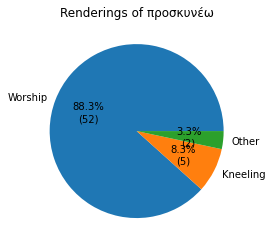

In [8]:
import matplotlib.pyplot as plt
worship=knee=other=0
for node in F.otype.s('word'):
    lemma=F.lemma.v(node)
    if lemma == 'προσκυνέω':
       gloss=F.gloss_EN.v(node)
       if 'worship' in gloss: 
          worship+=1
       else:
          if 'knee' in gloss: 
             knee+=1
          else:
             other+=1

# Dataset for the plot
labels = ['Worship', 'Kneeling', 'Other']
results = [worship, knee, other]

# create the pie chart with percentage and number of occurances
plt.pie(results, labels=labels, autopct=lambda pct: f'{pct:.1f}%\n({int(pct / 100 * sum(results))})', textprops={'color': 'black'})

# add a title to the pie chart
plt.title('Renderings of προσκυνέω')

# Show plot
plt.show()